In [1]:
%pylab inline

import os
import glob
import numpy as np
import astropy.table as astTable
import matplotlib.pyplot as plt
import xlens
import warnings
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [66]:
tract_list = [10054, 10055, 9570, 9571]
#tract_list = [10055, 9570]

flux_sim =  []
fwhm_sim = []
var_sim = []
size_sim = []

for tract in tract_list:
    tract_dir = "/work/xiangchong.li/work/hsc_s23b_sim/sim_cosmos/cosmos/dm_catalog/20241213T214357Z/sim_2_rot0_Coadd_meas/%s/" % (tract)
    sub_dirs = glob.glob(tract_dir + "/*")
    for patch_dir in sub_dirs:
        if len(glob.glob(patch_dir+ "/*")) < 5:
            continue
        file_name = glob.glob(patch_dir + "/i/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0 & (data["base_ClassificationExtendedness_value"]>0)]
        flux_sim.append(data["modelfit_CModel_instFlux"])
        fwhm_sim.append(xlens.catalog.basic.get_psf_size(data, pixel_scale=0.168))
        var_sim.append(data["base_Variance_value"])
        size_sim.append(xlens.catalog.basic.get_sdss_size(data))
flux_sim = np.hstack(flux_sim)
fwhm_sim = np.hstack(fwhm_sim)
var_sim = np.hstack(var_sim)
size_sim = np.hstack(size_sim)

size_sim0 = size_sim

In [3]:
flux_data =  []
fwhm_data = []
var_data = []
size_data = []
for tract in tract_list:
    tract_dir = "/lustre/HSC_DR/hsc_ssp/dr4/s23b/data/s23b_wide/unified/deepCoadd_meas/%s" % (tract)
    sub_dirs = glob.glob(tract_dir + "/*")
    for patch_dir in sub_dirs:
        if len(glob.glob(patch_dir+ "/*")) < 5:
            continue
        file_name = glob.glob(patch_dir + "/i/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0 & (data["base_ClassificationExtendedness_value"]>0)]
        flux_data.append(data["modelfit_CModel_instFlux"])
        fwhm_data.append(xlens.catalog.basic.get_psf_size(data, pixel_scale=0.168))
        var_data.append(data["base_Variance_value"])
        size_data.append(xlens.catalog.basic.get_sdss_size(data))
flux_data = np.hstack(flux_data)
fwhm_data = np.hstack(fwhm_data)
var_data = np.hstack(var_data)
size_data = np.hstack(size_data)

In [4]:
flux_sim_g = []
flux_sim_r = []
flux_sim_z = []
flux_sim_y = []
for tract in tract_list:
    tract_dir = "/work/xiangchong.li/work/hsc_s23b_sim/sim_cosmos/cosmos/dm_catalog/20241213T214357Z/sim_2_rot0_Coadd_meas/%s/" % (tract)
    sub_dirs = glob.glob(tract_dir + "/*")
    for patch_dir in sub_dirs:
        if len(glob.glob(patch_dir+ "/*")) < 5:
            continue
        file_name = glob.glob(patch_dir + "/g/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"] > 0)]
        flux_sim_g.append(data["modelfit_CModel_instFlux"])
            
        file_name = glob.glob(patch_dir + "/r/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"] > 0)]
        flux_sim_r.append(data["modelfit_CModel_instFlux"])
        
        file_name = glob.glob(patch_dir + "/z/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"] > 0)]
        flux_sim_z.append(data["modelfit_CModel_instFlux"])
        
        file_name = glob.glob(patch_dir + "/y/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"] > 0)]
        flux_sim_y.append(data["modelfit_CModel_instFlux"])
flux_sim_g = np.hstack(flux_sim_g)
flux_sim_r = np.hstack(flux_sim_r)
flux_sim_z = np.hstack(flux_sim_z)
flux_sim_y = np.hstack(flux_sim_y)

In [5]:
flux_data_g = []
flux_data_r = []
flux_data_z = []
flux_data_y = []
for tract in tract_list:
    tract_dir = "/lustre/HSC_DR/hsc_ssp/dr4/s23b/data/s23b_wide/unified/deepCoadd_meas/%s" % (tract)
    sub_dirs = glob.glob(tract_dir + "/*")
    for patch_dir in sub_dirs:
        if len(glob.glob(patch_dir+ "/*")) < 5:
            continue
        file_name = glob.glob(patch_dir + "/g/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"]>0)]
        flux_data_g.append(data["modelfit_CModel_instFlux"])
        
        file_name = glob.glob(patch_dir + "/r/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"]>0)]
        flux_data_r.append(data["modelfit_CModel_instFlux"])
        
        file_name = glob.glob(patch_dir + "/z/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"]>0)]
        flux_data_z.append(data["modelfit_CModel_instFlux"])
        
        file_name = glob.glob(patch_dir + "/y/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"]>0)]
        flux_data_y.append(data["modelfit_CModel_instFlux"])
flux_data_g = np.hstack(flux_data_g)
flux_data_r = np.hstack(flux_data_r)
flux_data_z = np.hstack(flux_data_z)
flux_data_y = np.hstack(flux_data_y)

In [120]:
def get_mag(flux):
    return 27.0 - np.log10(flux) * 2.5
mag_sim = get_mag(flux_sim)
mag_data = get_mag(flux_data)

mag_sim_g = get_mag(flux_sim_g)
mag_data_g = get_mag(flux_data_g)

mag_sim_r = get_mag(flux_sim_r)
mag_data_r = get_mag(flux_data_r)

mag_sim_z = get_mag(flux_sim_z)
mag_data_z = get_mag(flux_data_z)

mag_sim_y = get_mag(flux_sim_y)
mag_data_y = get_mag(flux_data_y)
size_sim = size_sim0

mag_lim = 25.5
mag_lim2 = 26.0
size_lim = 0.3

msk_sim =  (mag_sim < mag_lim) & (size_sim > size_lim)  & (mag_sim_r < mag_lim) & (mag_sim_z < mag_lim) & (mag_sim_y < mag_lim2) & (mag_sim_g < mag_lim2)& (mag_sim > 21.0)
msk_data =  (mag_data< mag_lim) & (size_data > size_lim) & (mag_data_r< mag_lim) & (mag_data_z< mag_lim) & (mag_data_y< mag_lim2) & (mag_data_g< mag_lim2) & (mag_data > 21.0)

Text(0, 0.5, 'PDF')

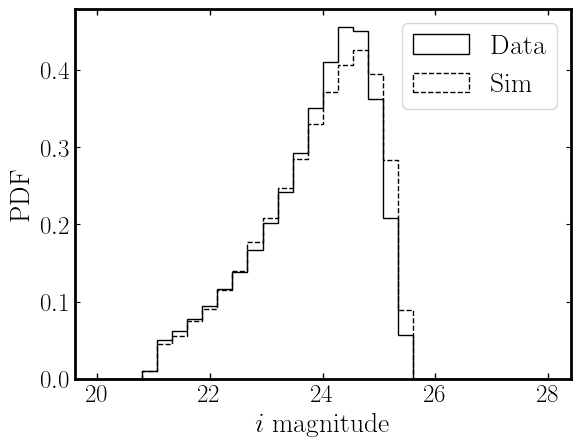

In [121]:
plt.close()
plt.hist(mag_data[msk_data], bins=30, range=(20, 28), histtype="step", density =True, color="black", label="Data")
plt.hist(mag_sim[msk_sim], bins=30, range=(20, 28), histtype="step", density=True, color="black", linestyle="--", label="Sim")
plt.legend()
plt.xlabel(r"$i$ magnitude")
plt.ylabel("PDF")

Text(0, 0.5, 'PDF')

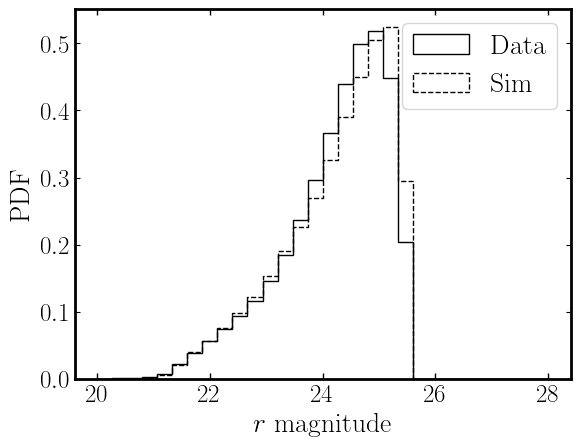

In [122]:
plt.hist(mag_data_r[msk_data], bins=30, range=(20, 28), histtype="step", density =True, color="black", label="Data")
plt.hist(mag_sim_r[msk_sim], bins=30, range=(20, 28), histtype="step", density=True, color="black", label="Sim", linestyle="--")
plt.legend()
plt.xlabel(r"$r$ magnitude")
plt.ylabel("PDF")

Text(0, 0.5, 'PDF')

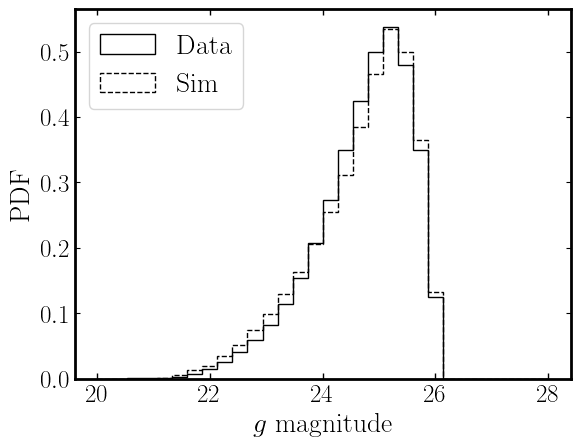

In [123]:
plt.hist(mag_data_g[msk_data], bins=30, range=(20, 28), histtype="step", density =True, color="black", label="Data")
plt.hist(mag_sim_g[msk_sim], bins=30, range=(20, 28), histtype="step", density=True, color="black", label="Sim", linestyle="--")
plt.legend()
plt.xlabel(r"$g$ magnitude")
plt.ylabel("PDF")

Text(0, 0.5, 'PDF')

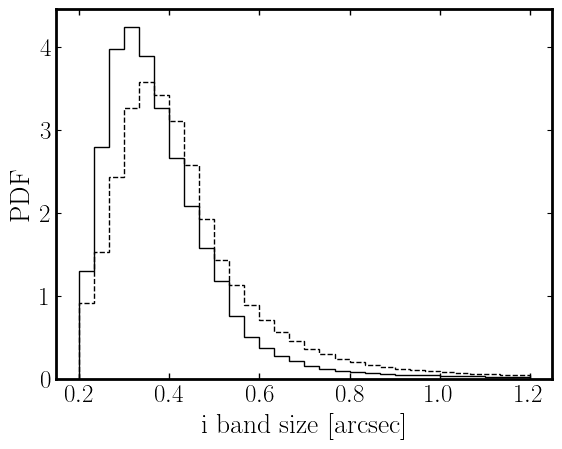

In [124]:
plt.close()
plt.hist(size_sim, bins=30, histtype="step", density=True, range=(0.2, 1.2), color="black", label="Sim", linestyle="--")
plt.hist(size_data, bins=30, histtype="step", density =True, range=(0.2, 1.2), color="black", label="Data", linestyle="-")
plt.xlabel("i band size [arcsec]")
plt.ylabel("PDF")

1.1167822899540722


Text(0, 0.5, 'PDF')

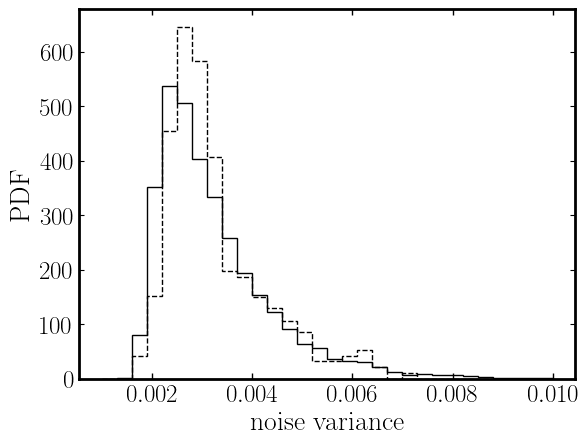

In [125]:
plt.close()
plt.hist(var_sim[msk_sim], bins=30, histtype="step", density=True, range=(1e-3, 1e-2), color="black", label="Sim", linestyle="--")
plt.hist(var_data[msk_data], bins=30, histtype="step", density =True, range=(1e-3, 1e-2), color="black", label="Data", linestyle="-")
print(np.nanmean(var_sim[msk_sim]) / np.nanmean(var_data[msk_data]))
plt.xlabel("noise variance")
plt.ylabel("PDF")

Text(0, 0.5, 'PDF')

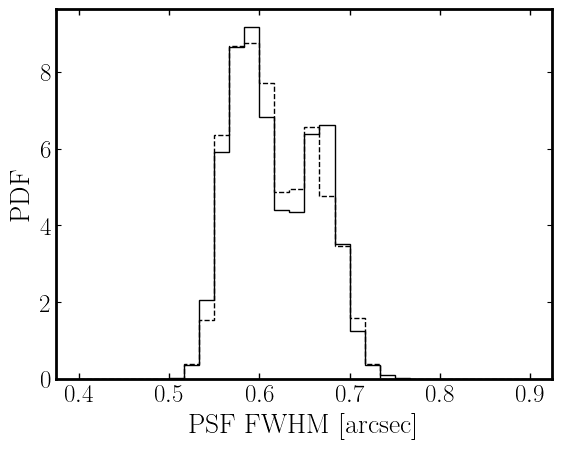

In [109]:
plt.close()
plt.hist(fwhm_sim, bins=30, histtype="step", density=True, range=(0.4, 0.9), color="black", label="Sim", linestyle="--")
plt.hist(fwhm_data, bins=30, histtype="step", density =True, range=(0.4, 0.9), color="black", label="Data", linestyle="-")
plt.xlabel("PSF FWHM [arcsec]")
plt.ylabel("PDF")

In [110]:
class corner_plot:
    def __init__(self, xrange, yrange, bins=30, xlabel="x", ylabel="y", xlim=None, ylim=None):
        fig = plt.figure(figsize=(8, 8))
        gs = fig.add_gridspec(4, 4, wspace=0.05, hspace=0.05)
        # 2D Contour plot (central plot)
        self.ax_2d = fig.add_subplot(gs[1:4, 0:3])
        self.ax_2d.set_xlabel(xlabel)
        self.ax_2d.set_ylabel(ylabel)
        
        self.ax_top = fig.add_subplot(gs[0, 0:3], sharex=self.ax_2d)
        self.ax_top.set_ylabel('PDF')
        self.ax_top.tick_params(axis="x", labelbottom=False)
        
        self.ax_right = fig.add_subplot(gs[1:4, 3], sharey=self.ax_2d)
        self.ax_right.set_xlabel('PDF')
        self.ax_right.tick_params(axis="y", labelleft=False)
        
        self.range_2d = [xrange, yrange]
        self.range_x = xrange
        self.range_y = yrange
        self.bins = bins

        if xlim is None:
            xlim = self.range_x
            
        if ylim is None:
            ylim = self.range_y
        self.ax_2d.set_xlim(xlim)
        self.ax_2d.set_ylim(ylim)
        self.ax_top.set_xlim(xlim)
        self.ax_right.set_ylim(ylim)
        return

    def make_plot(self, x_array, y_array, linestyles="-", levels=[0.1, 0.3, 0.6]):
        # Create figure and gridspec
        hist, xedges, yedges = np.histogram2d(
            x=x_array, y=y_array, bins=self.bins,
            range=self.range_2d,
            density=True,
        )
        # Calculate the midpoints of bins
        xcenters = 0.5 * (xedges[:-1] + xedges[1:])
        ycenters = 0.5 * (yedges[:-1] + yedges[1:])
        X, Y = np.meshgrid(xcenters, ycenters)
        
        # Contour plot
        contour = self.ax_2d.contour(
            X, Y, hist.T, levels=levels, 
            colors="black", linestyles=linestyles,
        )
        
        # 1D Histogram (top plot)
        self.ax_top.hist(x_array, bins=self.bins, histtype='step', color='black', 
            range=self.range_x, density=True, ls=linestyles,
        )
        
        # 1D Histogram (right plot)
        self.ax_right.hist(y_array, bins=self.bins, histtype='step', color='black', 
            range=self.range_y, density=True, 
            ls=linestyles, orientation='horizontal', 
        )
        
        # Final adjustments
        plt.tight_layout()

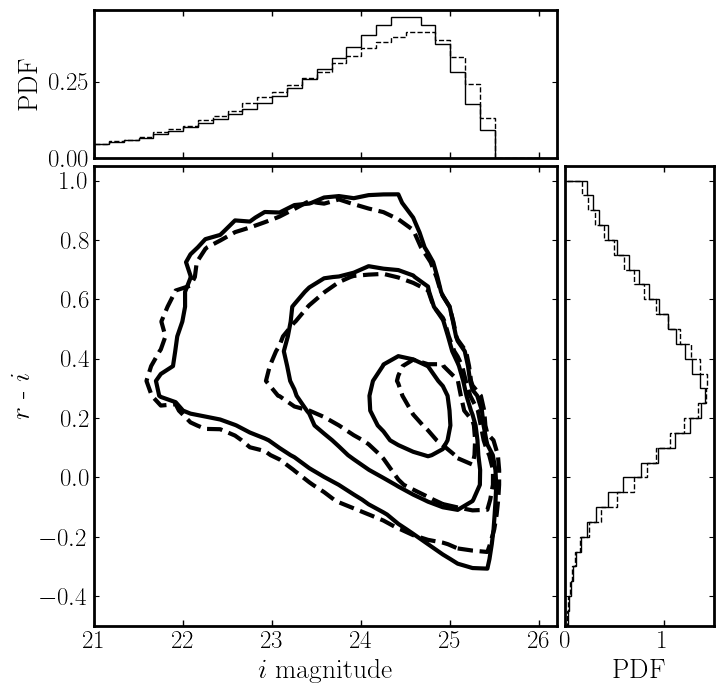

In [111]:
plt.close()
xrange = [21.0, 26.0]
yrange = [-0.5, 1.0]
xlabel = r'$i$ magnitude'
ylabel = r'$r$ - $i$'

corp = corner_plot(
    xrange=xrange, yrange=yrange, bins=30, xlabel=xlabel, ylabel=ylabel,
    xlim=[21, 26.2], ylim=[-0.5, 1.05]
)

x_array = mag_sim[msk_sim]
y_array = mag_sim_r[msk_sim] - mag_sim[msk_sim]

x_array_d = mag_data[msk_data]
y_array_d = mag_data_r[msk_data] - mag_data[msk_data]

corp.make_plot(x_array=x_array_d, y_array=y_array_d, linestyles="-")
corp.make_plot(x_array=x_array, y_array=y_array, linestyles="--")

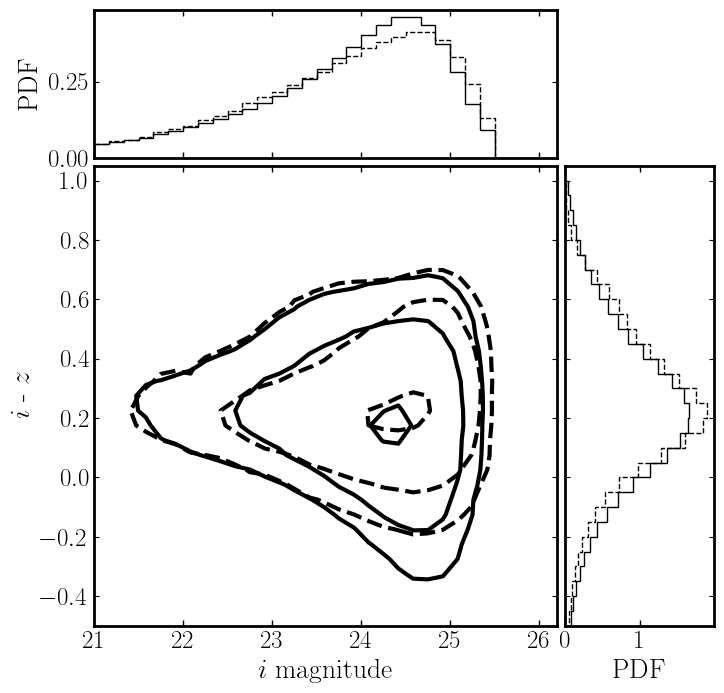

In [112]:
plt.close()

xrange = [21.0, 26.0]
yrange = [-0.5, 1.0]
xlabel = r'$i$ magnitude'
ylabel = r'$i$ - $z$'

corp = corner_plot(
    xrange=xrange, yrange=yrange, bins=30, xlabel=xlabel, ylabel=ylabel,
    xlim=[21, 26.2], ylim=[-0.5, 1.05]
)

x_array = mag_sim[msk_sim]
y_array = mag_sim[msk_sim] - mag_sim_z[msk_sim]

x_array_d = mag_data[msk_data]
y_array_d = mag_data[msk_data] - mag_data_z[msk_data]

corp.make_plot(x_array=x_array_d, y_array=y_array_d, linestyles="-", levels=[0.15, 0.3, 0.65])
corp.make_plot(x_array=x_array, y_array=y_array, linestyles="--", levels=[0.15, 0.3, 0.65])

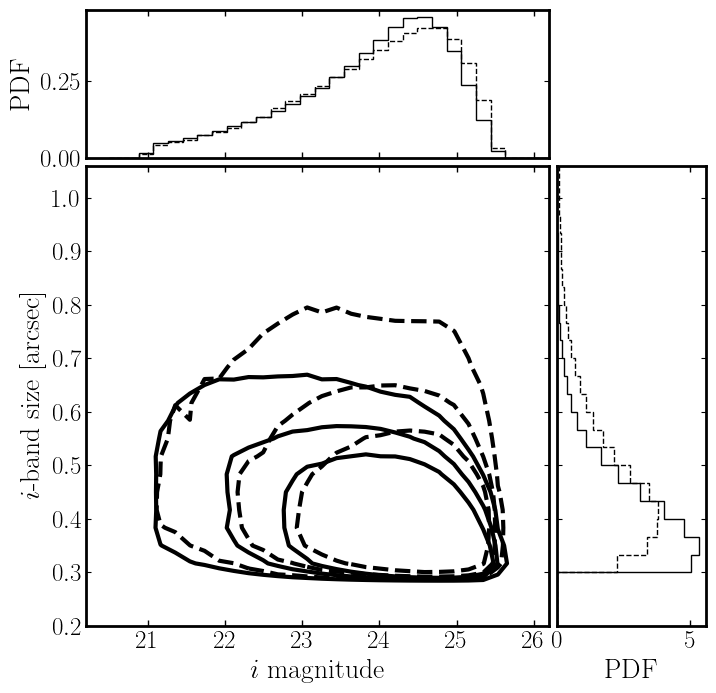

In [126]:
plt.close()

xrange = [20.5, 26.2]
yrange = [0.2, 1.2]
xlabel = r'$i$ magnitude'
ylabel = r'$i$-band size [arcsec]'
corp = corner_plot(
    xrange=xrange, yrange=yrange, bins=30, xlabel=xlabel, ylabel=ylabel,
    xlim=[20.2, 26.2], ylim=[0.2, 1.06]
)

x_array = mag_sim[msk_sim]
y_array = size_sim[msk_sim]

x_array_d = mag_data[msk_data]
y_array_d = size_data[msk_data]

corp.make_plot(x_array=x_array_d, y_array=y_array_d, linestyles="-")
corp.make_plot(x_array=x_array, y_array=y_array, linestyles="--")

In [114]:
d_sim = np.vstack([np.log10(size_sim), get_mag(flux_sim_g), get_mag(flux_sim_r), get_mag(flux_sim), get_mag(flux_sim_z), get_mag(flux_sim_y)]).T
d_data = np.vstack([np.log10(size_data), get_mag(flux_data_g), get_mag(flux_data_r), get_mag(flux_data), get_mag(flux_data_z), get_mag(flux_data_y)]).T
d_sim = d_sim[msk_sim]
d_data = d_data[msk_data]
from minisom import MiniSom

data_min = np.min(d_data, axis=0)
data_max = np.max(d_data,axis=0)
d_norm_data = (d_data - data_min) / (data_max - data_min)
d_norm_sim = (d_sim - data_min) / (data_max - data_min)

In [127]:
som_size = (10, 10)
som = MiniSom(som_size[0], som_size[1], 5, sigma=0.1, learning_rate=1)

# Step 4: Train the SOM
print("Training SOM...")
som.random_weights_init(d_norm_data)
som.train_random(d_norm_data, 100)  # Train for 1000 iterations
print("Training complete!")
print(som.winner(d_norm_data[2]))

Training SOM...


ValueError: Received 6 features, expected 5.

In [ ]:
mapped_data = np.array([som.winner(d) for d in d_norm_data])
plt.close()
plt.hist2d(
    mapped_data[:, 0], 
    mapped_data[:, 1], 
    bins=(np.arange(-0.5, 10, 1), np.arange(0.5, 10, 1)),
    density=True,
)

In [ ]:
mapped_sim = np.array([som.winner(d) for d in d_norm_sim])
plt.close()
plt.hist2d(
    mapped_sim[:, 0], 
    mapped_sim[:, 1], 
    bins=(np.arange(-0.5, 10, 1), np.arange(0.5, 10, 1)),
    density=True,
)